## Paired plots 

In [404]:
data = pd.read_csv('../results/pair_experiment.csv')

In [405]:
do_floor, beta = True, 1.1
do_floor, beta = False, 1.05
data = data[(data['beta'] == beta) & (data['do_floor'] == do_floor)]

In [406]:
len(data)

252

In [407]:
data

,target_epsilon,target_delta,beta,do_floor,game_id,size_of_game,num_discard_cards,hand_p1,hand_p2,v_inf,v_1_inf,emp_sample_complexity,emp_simulation_complexity
300,0.01,0.05,1.05,False,3ff44312-6919-4df9-a2a3-41823f4bd307,100,2,"['H2', 'C5', 'D6', 'C7', 'D14']","['D2', 'S9', 'C11', 'S13', 'H14']",0.947649,75.145833,260598,20784174
301,0.01,0.05,1.05,False,3ff44312-6919-4df9-a2a3-41823f4bd307,100,3,"['H2', 'C5', 'D6', 'C7', 'D14']","['D2', 'S9', 'C11', 'S13', 'H14']",0.923847,74.153008,248189,20441852
302,0.01,0.05,1.05,False,945d02af-fff9-4ab0-9d7c-7d0000139546,100,2,"['H4', 'H7', 'H9', 'S10', 'H14']","['C4', 'C7', 'S11', 'C12', 'D14']",0.890432,66.537303,248189,18557956
303,0.01,0.05,1.05,False,945d02af-fff9-4ab0-9d7c-7d0000139546,100,3,"['H4', 'H7', 'H9', 'S10', 'H14']","['C4', 'C7', 'S11', 'C12', 'D14']",0.915758,66.369322,248189,18518219
304,0.01,0.05,1.05,False,a0a0388a-b6e6-48b9-999d-a22c35f911c1,100,2,"['C4', 'S5', 'S6', 'S8', 'H14']","['H3', 'D5', 'S10', 'H11', 'C13']",0.949753,83.894378,260598,23179173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,0.01,0.05,1.05,False,01440f1c-a1fa-4feb-b8f4-56b367c644f2,100,3,"['D5', 'D6', 'C11', 'C12', 'D14']","['D2', 'D4', 'S6', 'S10', 'D10']",0.922883,70.993990,248189,19741851
548,0.01,0.05,1.05,False,e996e1fb-199f-436d-84a4-c6a7aa9560d1,100,2,"['S2', 'S3', 'D3', 'C7', 'D7']","['D6', 'S9', 'H12', 'H13', 'S13']",0.903835,66.105129,248189,18371471
549,0.01,0.05,1.05,False,e996e1fb-199f-436d-84a4-c6a7aa9560d1,100,3,"['S2', 'S3', 'D3', 'C7', 'D7']","['D6', 'S9', 'H12', 'H13', 'S13']",0.907262,67.452909,248189,18705916
550,0.01,0.05,1.05,False,2dbb0175-17fa-4c72-9ebc-c9448396fe2a,100,2,"['D5', 'D6', 'C7', 'D7', 'C12']","['D2', 'H6', 'S6', 'H12', 'D12']",0.848615,35.711914,236371,10297278


In [408]:
data.nunique()

target_epsilon                 1
target_delta                   1
beta                           1
do_floor                       1
game_id                      126
size_of_game                   1
num_discard_cards              2
hand_p1                      126
hand_p2                      126
v_inf                        161
v_1_inf                      252
emp_sample_complexity          6
emp_simulation_complexity    252
dtype: int64

In [409]:
discard_2 = data[data['num_discard_cards'] == 2]
discard_3 = data[data['num_discard_cards'] == 3]

In [410]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev * 0.5

In [411]:
min(x), min(y)

(204186, 236200.26409771392)

In [412]:
def pair_expt_plot_save(plot_stat, beta, do_floor):
    
    axis_titles = {
    'emp_sample_complexity': 'empirical sample complexity', 
    'emp_simulation_complexity': 'empirical query complexity', 
    }
    
    fig, ax = plt.subplots()
    figure = plt.gcf()
    figure.set_size_inches(8, 8)
    
    plt.tight_layout()
    plt.title(f'Paired experiment, {axis_titles[plot_stat]}. \n {len(discard_3)} games, beta = {beta}, do_floor = {do_floor}.')
    plt.xlabel(f'Discard 2 {axis_titles[plot_stat]}')
    plt.ylabel(f'Discard 3 {axis_titles[plot_stat]}')

    x = discard_2[plot_stat]
    y = rand_jitter(discard_3[plot_stat])
    plt.scatter(
        x,
        y,
        s=25,
        marker=".",
        alpha=0.5
    )
    #min_min = min(min(x), min(y)) - (1000000 if plot_stat == 'emp_simulation_complexity' else 10000)
    min_min=0
    max_max = max(max(x), max(y)) + (1000000 if plot_stat == 'emp_simulation_complexity' else 10000)
    plt.xlim(min_min, max_max)
    plt.ylim(min_min, max_max)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

    plt.savefig(
        f"../plots/paired_texp_{plot_stat}_beta_{beta}.pdf",
        bbox_inches="tight",
        format="PDF",
        transparent=True,
    )

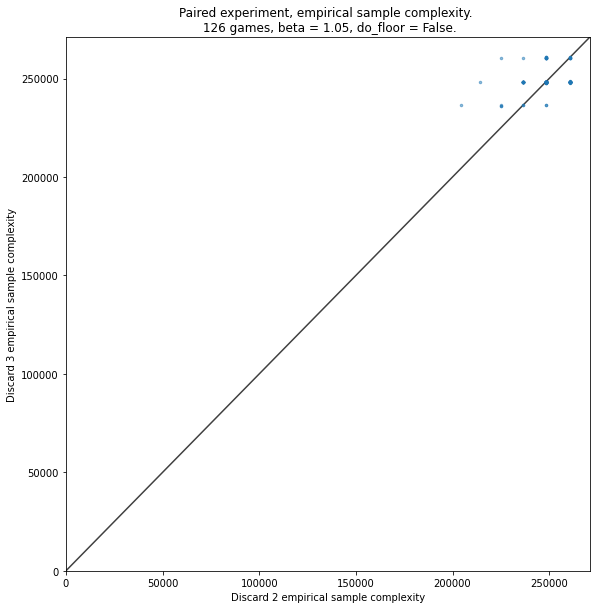

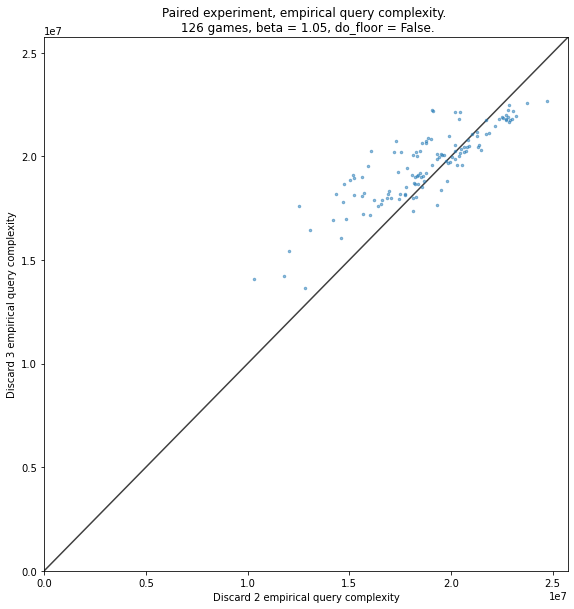

In [413]:
pair_expt_plot_save(plot_stat = 'emp_sample_complexity', beta= beta, do_floor = do_floor)
pair_expt_plot_save(plot_stat = 'emp_simulation_complexity', beta= beta, do_floor = do_floor)